# seaborn学习

* plotting functions
* multi-plot grids
* plot aesthetics

## plot functions
* 统计关系可视化
* 类别数据可视化
* 数据集分布可视化
* 线性关系可视化

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [16]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 散点图

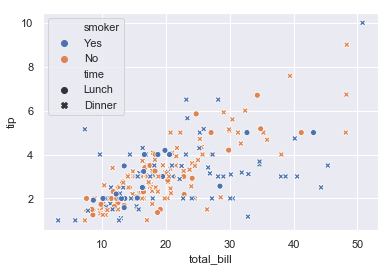

In [17]:
tips = sns.load_dataset('tips')#读取数据集，很多可以选择
sns.scatterplot(x="total_bill", y="tip", hue = 'smoker',style='time',data=tips)

>`hue`是分组函数，按smoker分组，给不同颜色
* Grouping variable that will produce points with different colors.

>`style`是分组函数，给不同的形状
* Grouping variable that will produce points with different markers.

>`palette`调色板

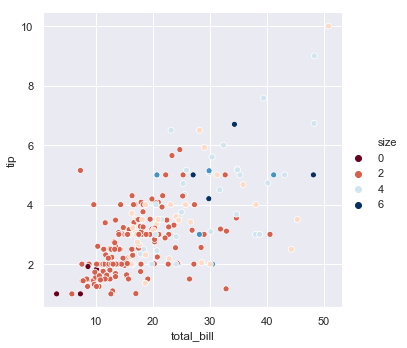

In [28]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="RdBu",data=tips);

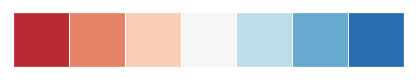

In [25]:
sns.palplot(sns.color_palette("RdBu",n_colors = 7))          #palplot调色板函数

### 时间序列

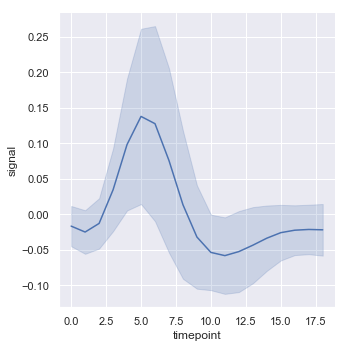

In [30]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", ci = "sd",data=fmri);

/Users/tony/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


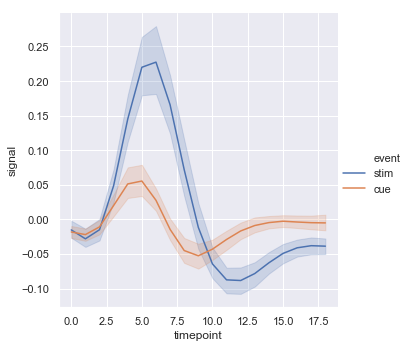

In [31]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

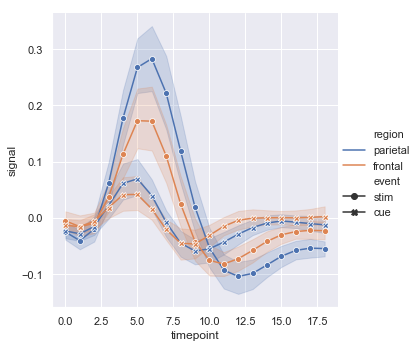

In [32]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

### 分面

`col`:Categorical variables that will determine the faceting of the grid.

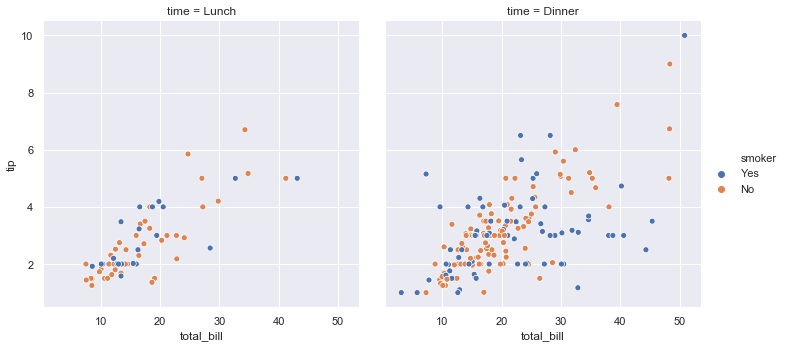

In [35]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);# col-代表分面

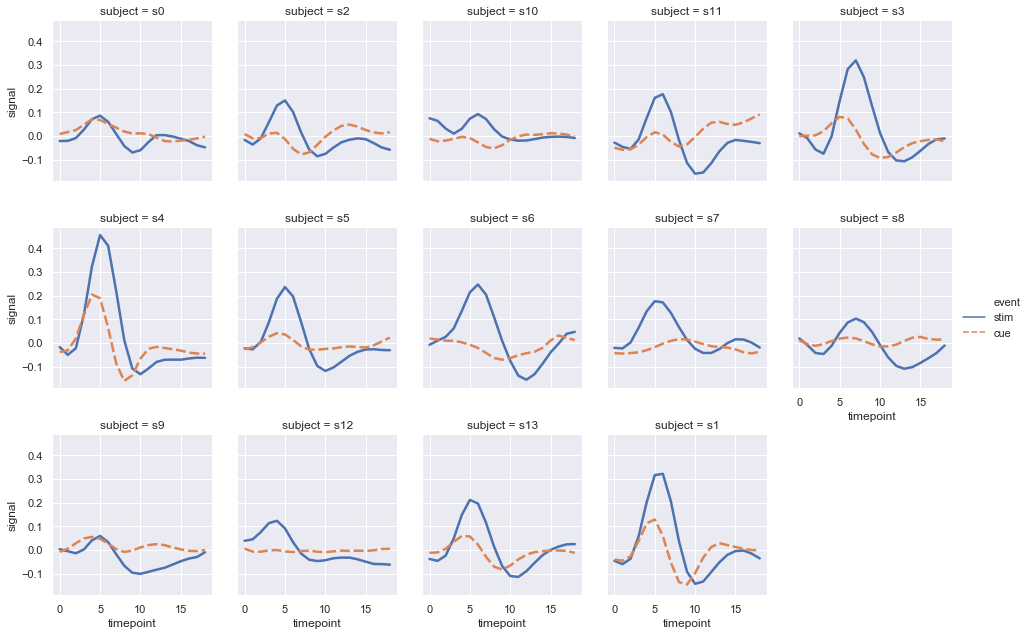

In [44]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.9, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

## 分组数据

>catplot

* strip
* swarm
* box
* point
* bar
* count

>`kind`:类型

>`jitter`:抖动

>data.query()筛选数据

/Users/tony/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


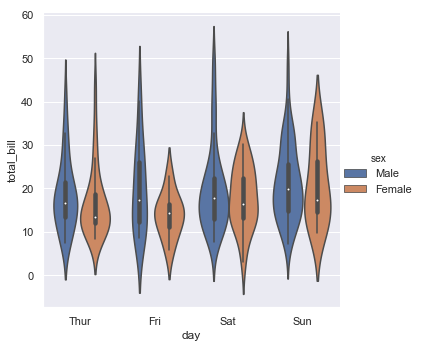

In [70]:
sns.catplot(x="day", y="total_bill",jitter=False,hue = 'sex',kind='violin',data=tips.query("size !=3"));#jitter抖动

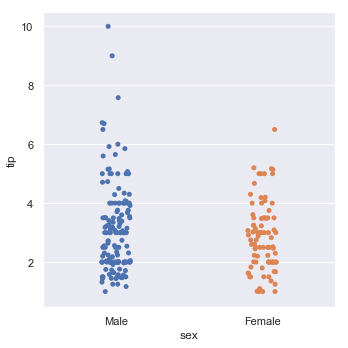

In [77]:
sns.catplot(x="sex", y="tip", order=["Male","Female"],data=tips);#order,横坐标

In [72]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


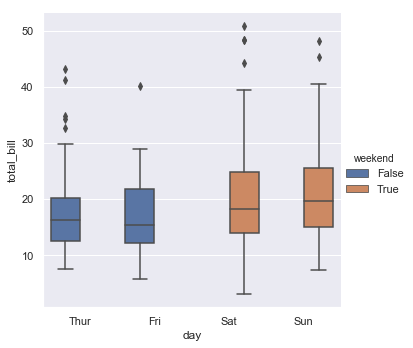

In [85]:
sns.catplot(x="day", y="total_bill", kind="box",hue = 'weekend',data=tips);

In [81]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])   #找出周末，优秀

In [82]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


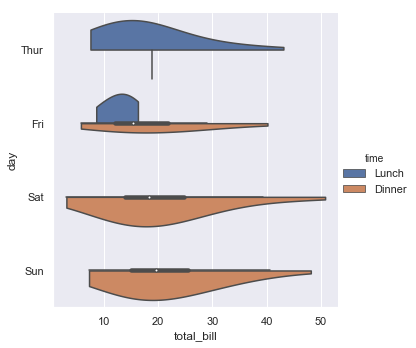

In [97]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips,bw = 0.9,cut = 0,split = True);#bw,平滑，cut截尾，split-分割

In [98]:
titanic = sns.load_dataset("titanic")

In [100]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


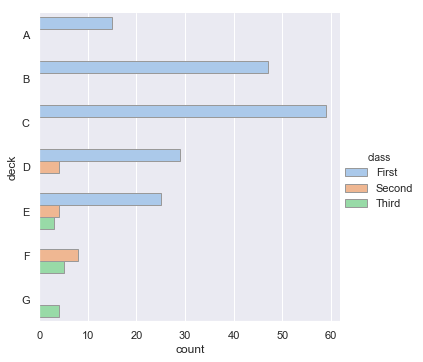

In [101]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);#count不需要某一个轴

/Users/tony/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


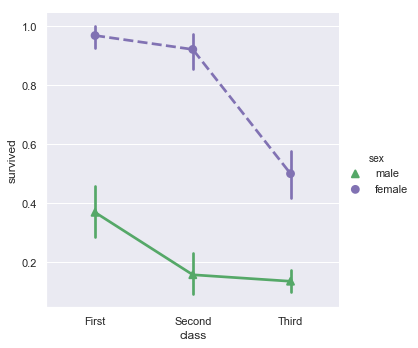

In [102]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);# 分配颜色，标记点形状和线型

## 数据分布

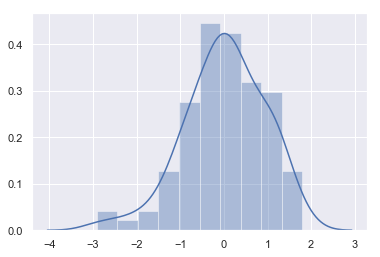

In [104]:
x = np.random.normal(size=100)
sns.distplot(x);#distplot

/Users/tony/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


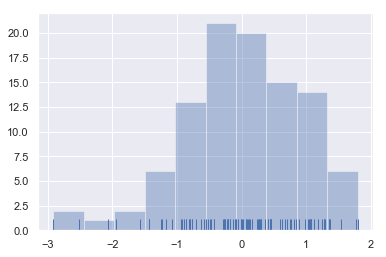

In [105]:
sns.distplot(x, kde=False, rug=True);

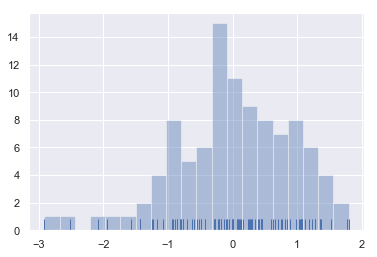

In [107]:
sns.distplot(x, bins=20, kde=False, rug=True);

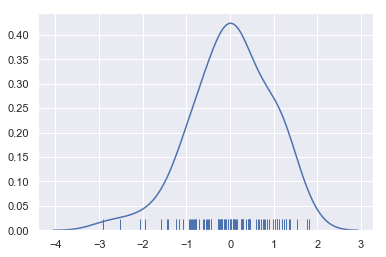

In [110]:
sns.distplot(x, hist=False, rug=True,);

In [112]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])


In [114]:
df.head()

,x,y
0,-0.280797,1.848966
1,-0.482504,-0.517394
2,-1.271634,0.411812
3,0.004764,1.113365
4,-1.251096,-0.694775


/Users/tony/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


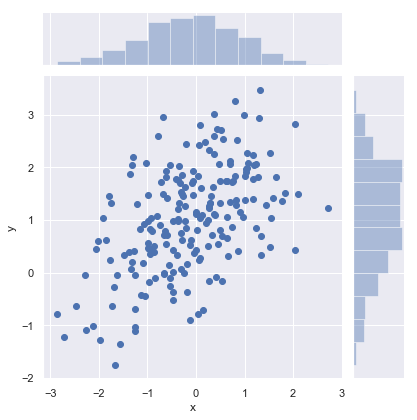

In [115]:
sns.jointplot(x="x", y="y", data=df);

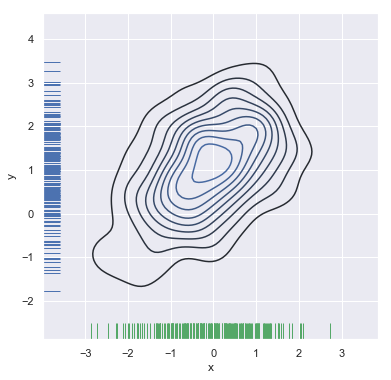

In [116]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

### pairwise dataset

/Users/tony/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


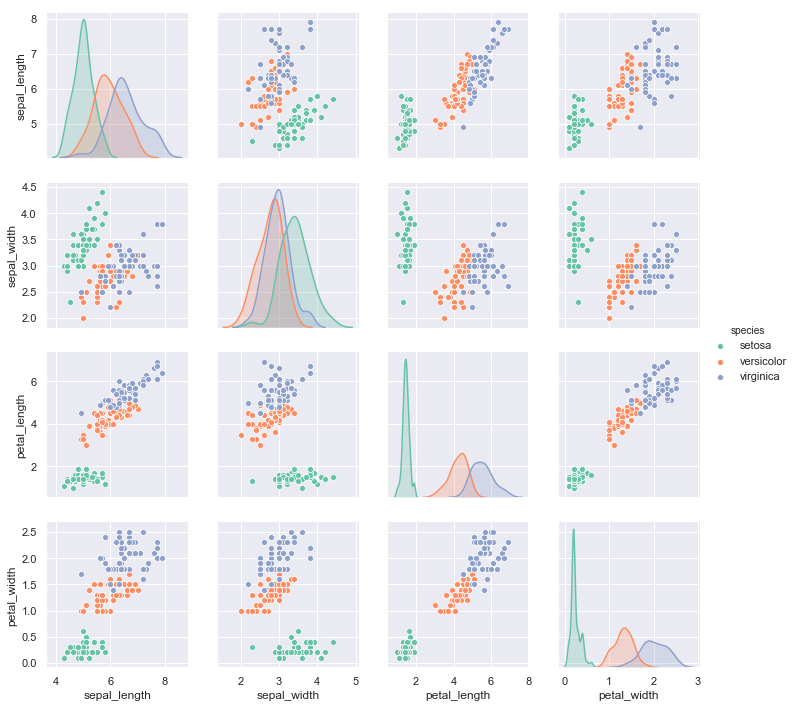

In [142]:
iris = sns.load_dataset("iris")
sns.pairplot(iris,hue="species",palette="Set2");

### linear relationships

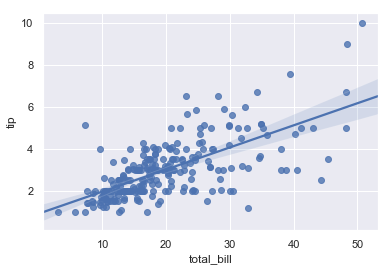

In [121]:
sns.regplot(x="total_bill", y="tip", data=tips);

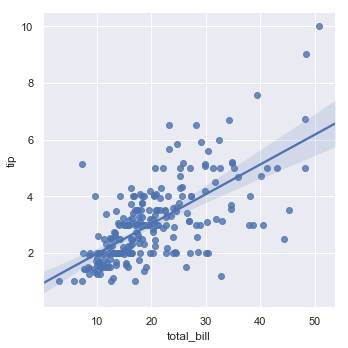

In [122]:
sns.lmplot(x="total_bill", y="tip", data=tips);

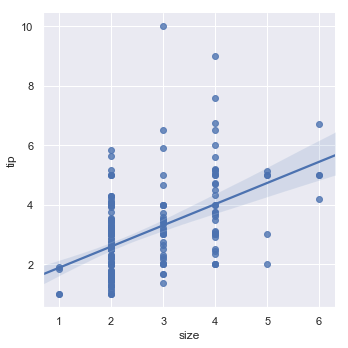

In [123]:
sns.lmplot(x="size", y="tip", data=tips);

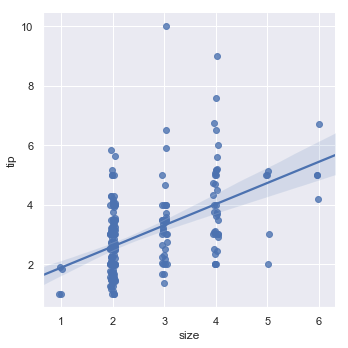

In [124]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

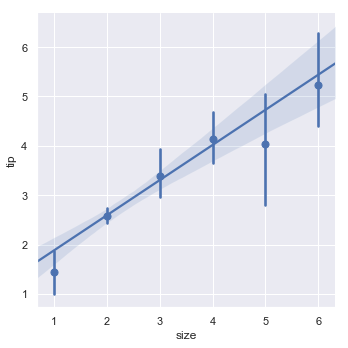

In [125]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);#Apply this function to each unique value of ``x`` and plot the resulting estimate. 

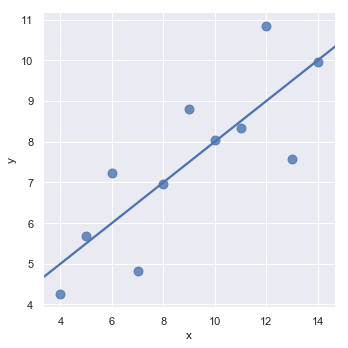

In [127]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

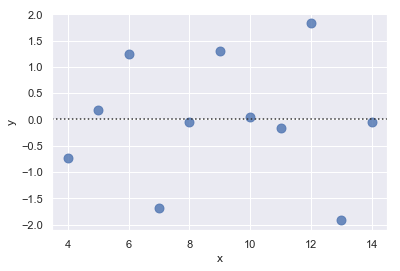

In [134]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});#残差图

/Users/tony/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


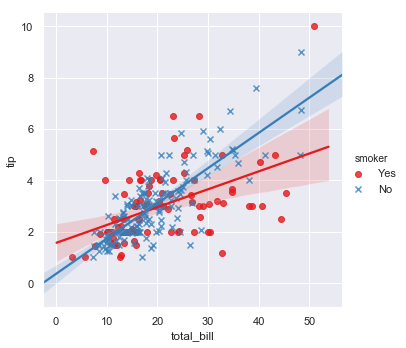

In [138]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",markers=["o","x"],palette="Set1",data=tips);

/Users/tony/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


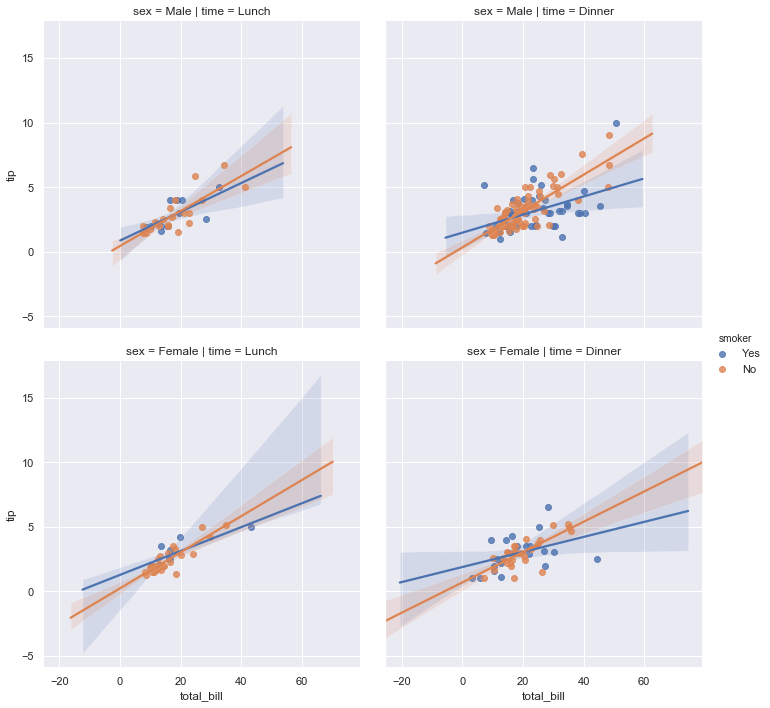

In [140]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", row="sex",data=tips);

## 分面

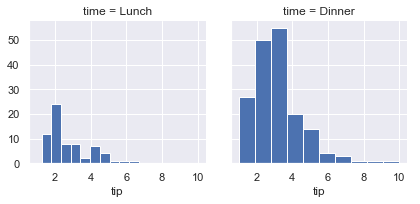

In [148]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");#先创建分面对象，之后写在一起

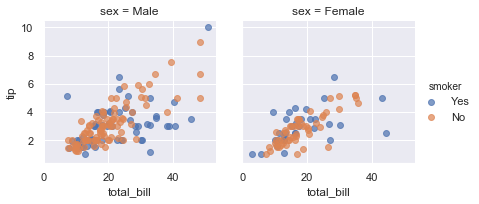

In [150]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();# FacetFrid之后用map()

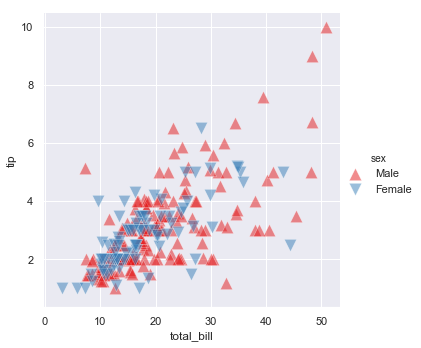

In [157]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", height=5,hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=150, linewidth=.5,alpha = .5,edgecolor="white")
g.add_legend();#hue_kws形状，s大小

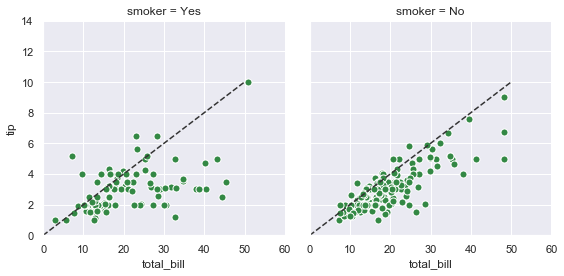

In [158]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14));#先定一个分面对象，接下来全是对对象的操作

## 设置外观

In [169]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

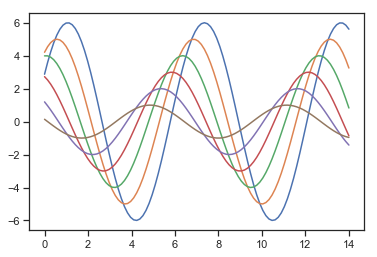

In [177]:
sns.set(style='ticks')#设置风格darkgrid,whitegrid,dark,white,ticks
sinplot()

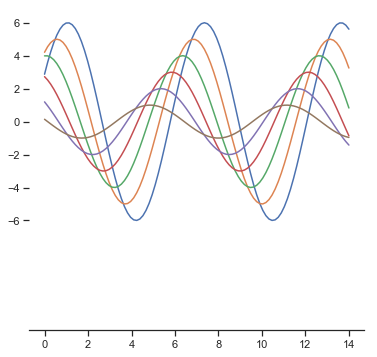

In [189]:
sinplot()
sns.despine(left=True,offset=100)#移除axes spines;offset-底部坐标轴位置

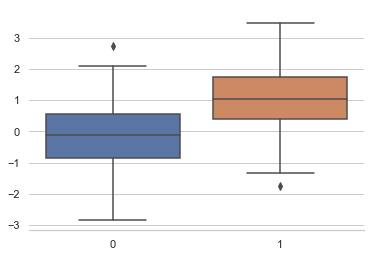

In [190]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True)

### 设置颜色
[seaborn](http://seaborn.pydata.org/tutorial/color_palettes.html)

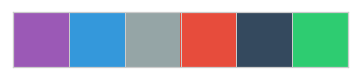

In [191]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))#填入颜色的代码，用于显示

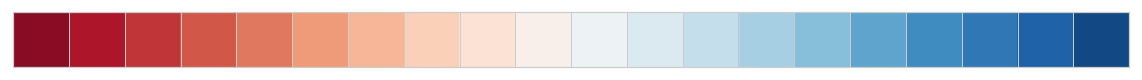

In [200]:
sns.palplot(sns.color_palette("RdBu",20))#RdBu默认的配色名称,颜色级别

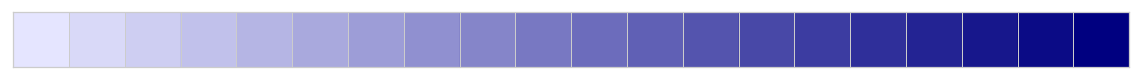

In [202]:
sns.palplot(sns.("navy", 20))#light是连续渐变

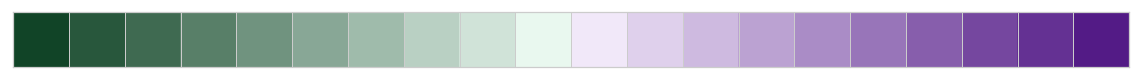

In [208]:
sns.palplot(sns.diverging_palette(140, 280, s=85, l=25, n=20))#对立的颜色，s饱和度l明度

## 推荐阅读

[seaborn手册](http://seaborn.pydata.org/tutorial.html)

[API-用法](http://seaborn.pydata.org/api.html)